In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df = df.drop(['Cabin'], axis=1).reset_index(drop=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/var/folders/zs/th7t891d5gb13xl22_k4pyt00000gn/T/ipykernel_90031/3322804569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/zs/th7t891d5gb13xl22_k4pyt00000gn/T/ipykernel_90031/3322804569.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [12]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df = remove_outliers(df, 'Age')

In [13]:
df = df.drop_duplicates()

In [14]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle_Aged', 'Senior'])

In [21]:
category_features = ['Sex', 'Embarked', 'Age_Group']

In [23]:
df_one_hot_enc = pd.get_dummies(df, columns=category_features, drop_first=1)
df_one_hot_enc.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Age_Group_Adult,Age_Group_Middle_Aged,Age_Group_Senior
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.0,1,0,PC 17599,71.2833,False,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True,True,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True,True,False,False


In [25]:
X = df_one_hot_enc.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']

In [26]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Age_Group_Adult,Age_Group_Middle_Aged,Age_Group_Senior
0,1,3,22.0,1,0,7.2500,True,False,True,False,False,False
1,2,1,38.0,1,0,71.2833,False,False,False,True,False,False
2,3,3,26.0,0,0,7.9250,False,False,True,True,False,False
3,4,1,35.0,1,0,53.1000,False,False,True,True,False,False
4,5,3,35.0,0,0,8.0500,True,False,True,True,False,False


In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [28]:
smote = SMOTE(
    sampling_strategy='auto',
    random_state=42
)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [41]:
def predict_results(model, X_train, X_valid, y_train, y_valid):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred)
    recall = recall_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
    ConfusionMatrixDisplay.from_estimator(model, X_valid, y_valid)
    plt.show()

In [42]:
print(y_train.value_counts())
print(y_train_resampled.value_counts())

Survived
0    409
1    251
Name: count, dtype: int64
Survived
0    409
1    409
Name: count, dtype: int64


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

In [45]:
param_grid_lr = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga']
    },
    {
        'penalty': ['l2'],
        'solver': ['liblinear', 'lbfgs', 'saga']
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga']
    }
]

In [46]:
from sklearn.model_selection import GridSearchCV

grid_lr = GridSearchCV(
    estimator=lr_model,
    param_grid=param_grid_lr,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

grid_lr.fit(X, y)

print(grid_lr.best_params_)
print(grid_lr.best_score_)

/Users/mariyamatveeva/Desktop/titanic/smote_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/mariyamatveeva/Desktop/titanic/smote_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/Users/mariyamatveeva/Desktop/titanic/smote_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead

{'penalty': 'l2', 'solver': 'lbfgs'}
0.7289682834584769


/Users/mariyamatveeva/Desktop/titanic/smote_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/mariyamatveeva/Desktop/titanic/smote_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [47]:
lr_model = LogisticRegression(
    penalty="l2",
    max_iter=1000,
    random_state=42,
    solver='lbfgs'
)

In [48]:
print(y_valid.value_counts())

Survived
0    102
1     63
Name: count, dtype: int64


/Users/mariyamatveeva/Desktop/titanic/smote_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/mariyamatveeva/Desktop/titanic/smote_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

Accuracy: 0.7879, Precision: 0.7258, Recall: 0.7143, F1-score: 0.7200


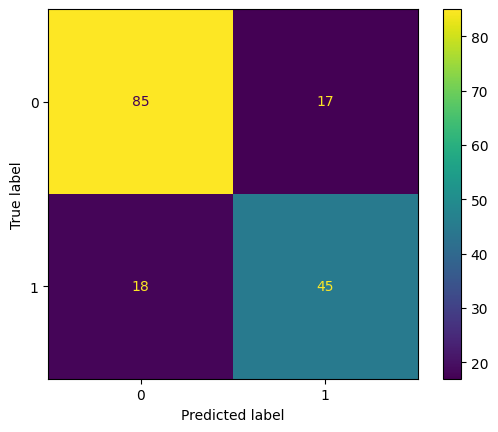

In [49]:
predict_results(lr_model, X_train, X_valid, y_train, y_valid)

Accuracy: 0.7212, Precision: 0.6133, Recall: 0.7302, F1-score: 0.6667


/Users/mariyamatveeva/Desktop/titanic/smote_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/mariyamatveeva/Desktop/titanic/smote_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

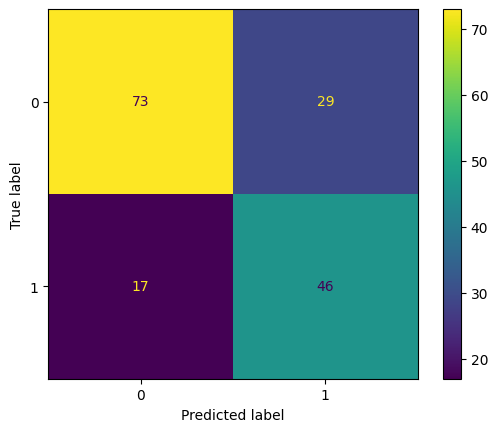

In [50]:
predict_results(lr_model, X_train_resampled, X_valid, y_train_resampled, y_valid)

Пока лучше несэмплированная логическая регрессия

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
param_grid_knn = {
    'n_neighbors': list(range(3, 11)),
    'weights': ['uniform', 'distance']
}

In [53]:
knn_model = KNeighborsClassifier()

In [54]:
grid_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    scoring='f1',
    cv=5
)

grid_knn.fit(X, y)

print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'n_neighbors': 3, 'weights': 'distance'}
0.34032452360723386


In [55]:
knn_model = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance'
)

Accuracy: 0.6424, Precision: 0.5370, Recall: 0.4603, F1-score: 0.4957


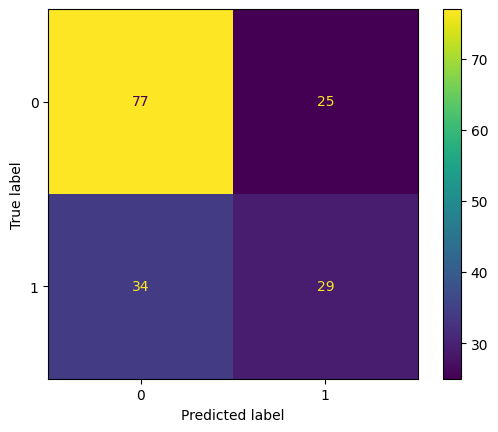

In [56]:
predict_results(knn_model, X_train, X_valid, y_train, y_valid)

Accuracy: 0.5879, Precision: 0.4615, Recall: 0.4762, F1-score: 0.4688


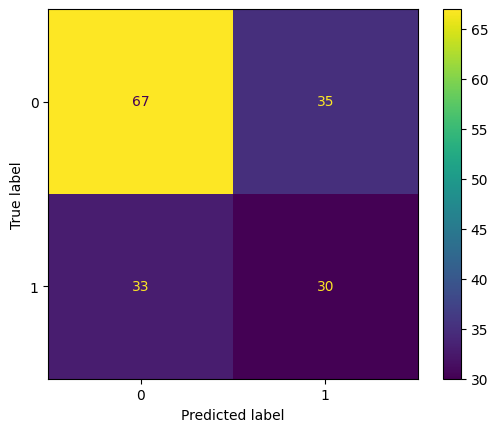

In [57]:
predict_results(knn_model, X_train_resampled, X_valid, y_train_resampled, y_valid)

Все еще лучше несэмплированная логическая регрессия

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

In [60]:
dt_model = DecisionTreeClassifier(random_state=42)

In [61]:
grid_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid_dt,
    scoring='f1',
    cv=5
)

grid_dt.fit(X, y)

print(grid_dt.best_params_)
print(grid_dt.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
0.7527931260167676


In [62]:
dt_model = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_leaf=5,
)

Accuracy: 0.7879, Precision: 0.7188, Recall: 0.7302, F1-score: 0.7244


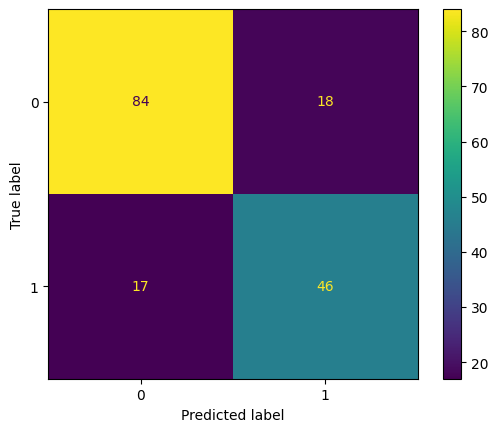

In [63]:
predict_results(dt_model, X_train, X_valid, y_train, y_valid)

Accuracy: 0.7758, Precision: 0.6806, Recall: 0.7778, F1-score: 0.7259


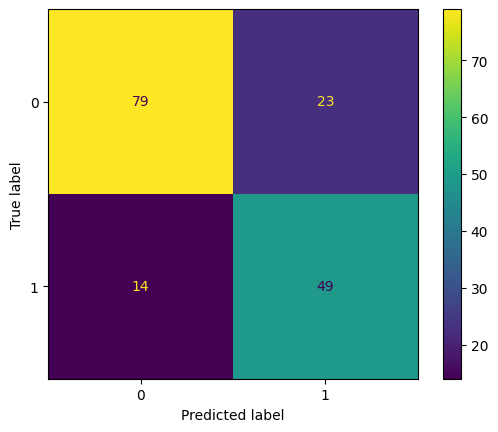

In [64]:
predict_results(dt_model, X_train_resampled, X_valid, y_train_resampled, y_valid)

Самый высокий показатель F1

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf_model = RandomForestClassifier(
    n_estimators=891,
    criterion="gini",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features="sqrt",
    bootstrap=True,
    random_state=42
)

Accuracy: 0.8182, Precision: 0.8113, Recall: 0.6825, F1-score: 0.7414


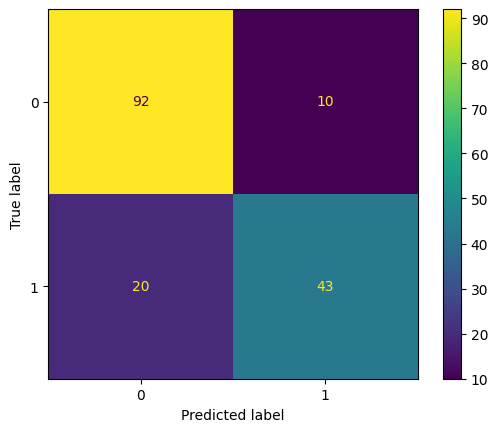

In [68]:
predict_results(rf_model, X_train, X_valid, y_train, y_valid)

Accuracy: 0.7636, Precision: 0.6875, Recall: 0.6984, F1-score: 0.6929


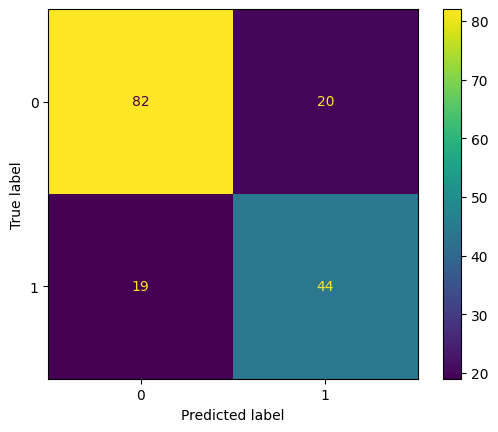

In [69]:
predict_results(rf_model, X_train_resampled, X_valid, y_train_resampled, y_valid)

Лучше без сэмплирования

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

In [71]:
gb_model = GradientBoostingClassifier(
    n_estimators=891,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=5,
    subsample=1.0,
    random_state=42
)

Accuracy: 0.7939, Precision: 0.7458, Recall: 0.6984, F1-score: 0.7213


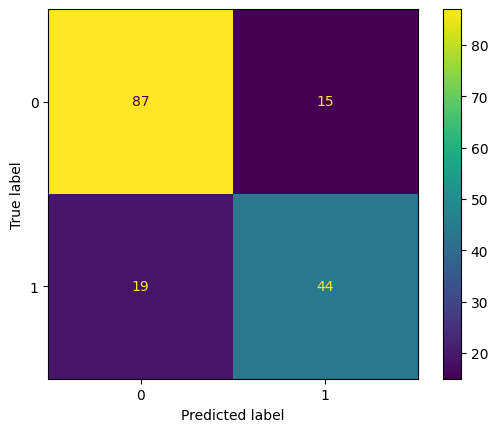

In [72]:
predict_results(gb_model, X_train, X_valid, y_train, y_valid)

Accuracy: 0.7818, Precision: 0.7143, Recall: 0.7143, F1-score: 0.7143


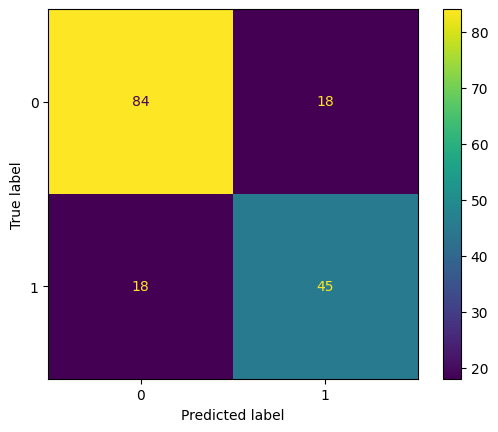

In [73]:
predict_results(gb_model, X_train_resampled, X_valid, y_train_resampled, y_valid)

Более точный результат дает бэггинг без сэмплирования

In [74]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [75]:
stacking_model = StackingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)),
        ("svc", SVC(kernel="rbf", probability=True, random_state=42)),
        ("tree", DecisionTreeClassifier(max_depth=5, random_state=42))
    ],
    final_estimator=LogisticRegression(),
    passthrough=False,
    n_jobs=-1
)

Accuracy: 0.8182, Precision: 0.7895, Recall: 0.7143, F1-score: 0.7500


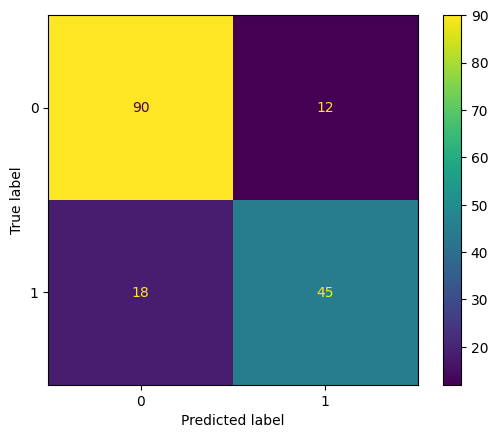

In [76]:
predict_results(stacking_model, X_train, X_valid, y_train, y_valid)

Accuracy: 0.7758, Precision: 0.6970, Recall: 0.7302, F1-score: 0.7132


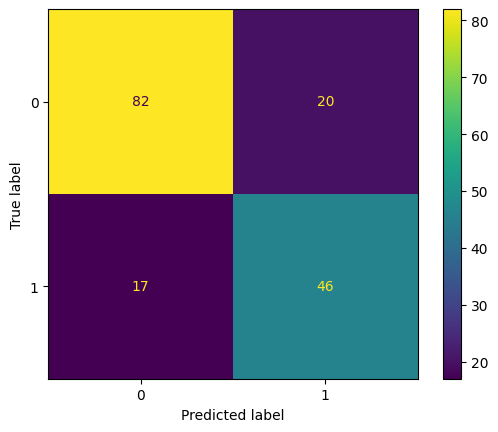

In [77]:
predict_results(stacking_model, X_train_resampled, X_valid, y_train_resampled, y_valid)

Наиболее точный результат из всех дает стэкинг без сэмплирования

In [86]:
df_test= pd.read_csv('test.csv')

In [90]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [91]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
df_test = df_test.drop(['Cabin'], axis=1).reset_index(drop=True)

/var/folders/zs/th7t891d5gb13xl22_k4pyt00000gn/T/ipykernel_90031/3678636698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
/var/folders/zs/th7t891d5gb13xl22_k4pyt00000gn/T/ipykernel_90031/3678636698.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [92]:
X_test = df_test.reindex(columns=X.columns, fill_value=0)

In [93]:
y_pred = stacking_model.predict(X_test)

In [94]:
result = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_pred
})

In [95]:
result.to_csv('predictions.csv', index=False)

Рейтинг 0.42105, нужно доработать(